In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import textwrap
import re


from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rc('font',family='Arial')

%matplotlib widget

In [2]:
pos_file = '/Users/zachlevin/Desktop/Neuroscience/Fleischmann Lab/NPH/THESIS/DATA/sx_improve_cog/GSEA/gsea_report_for_na_neg_1648754700610.tsv'
#neg_file = '/Users/zachlevin/Desktop/Neuroscience/Fleischmann Lab/NPH/THESIS/DATA/sx_improve_urinary/GSEA/gsea_report_for_na_neg_1648754743316.tsv'



In [3]:
pos_enrichment_res = pd.read_csv(pos_file, sep='\t', header=0)
#neg_enrichment_res = pd.read_csv(neg_file, sep='\t', header=0)

In [4]:
def process_name(name_col):
    kegg_removed = [i[5:] for i in name_col]
    
    with_spaces = [i.replace("_", " ") for i in kegg_removed]
    
    #with_sp
    
    return with_spaces

In [5]:
def process_res(res_df):
    n = 20
    
    res_copy = res_df.copy(deep=True)
    
    res_copy = res_copy.sort_values(by='FDR q-val')
    
    res_copy['NAME'] = process_name(res_copy['NAME'])
    res_copy['log10pval'] = [-math.log(i+.000001) for i in res_copy['NOM p-val']]
    res_copy['wrapped'] = ['\n'.join(re.findall('.{1,%i}' % n, string)) for string in res_copy['NAME']]
    
    return res_copy
    

In [6]:
def get_sig_res(pos,neg):
    pos_sig = pos.loc[pos['FDR q-val'] < .25]
    neg_sig = neg.loc[neg['FDR q-val'] < .25]
    
    return pd.concat([pos_sig,neg_sig]).sort_values(by='NES')

In [7]:
pos_processed = process_res(pos_enrichment_res)
#neg_processed = process_res(neg_enrichment_res)

In [8]:
sig_res = pos_processed.loc[pos_processed['FDR q-val'] < .25].sort_values(by='NES')

In [9]:
#sig_res = get_sig_res(pos_processed,neg_processed)

In [10]:
sig_res

NAME  \
0  VALINE LEUCINE AND ISOLEUCINE DEGRADATION   
1                       BUTANOATE METABOLISM   
2      PATHOGENIC ESCHERICHIA COLI INFECTION   
3                SELENOAMINO ACID METABOLISM   
5                      PROPANOATE METABOLISM   

                     GS<br> follow link to MSigDB   GS DETAILS  SIZE  \
0  KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION  Details ...    41   
1                       KEGG_BUTANOATE_METABOLISM  Details ...    25   
2      KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION  Details ...    46   
3                KEGG_SELENOAMINO_ACID_METABOLISM  Details ...    21   
5                      KEGG_PROPANOATE_METABOLISM  Details ...    29   

         ES       NES  NOM p-val  FDR q-val  FWER p-val  RANK AT MAX  \
0 -0.545269 -2.033585   0.000000   0.009768       0.009         4047   
1 -0.525339 -1.725286   0.011521   0.149426       0.249         4522   
2 -0.429799 -1.625741   0.009524   0.228928       0.491         2485   
3 -0.515559 -1.623925   0.023913   0.173122       0.493         2084   
5 -0.445719 -1.534953   0.030227   0.236779       0.761         1399   

                      LEADING EDGE  Unnamed: 11  log10pval  \
0   tags=61%, list=31%, signal=88%          NaN  13.815511   
1  tags=68%, list=35%, signal=104%          NaN   4.463520   
2   tags=39%, list=19%, signal=48%          NaN   4.653855   
3   tags=43%, list=16%, signal=51%          NaN   3.733289   
5   tags=28%, list=11%, signal=31%          NaN   3.498997   

                                         wrapped  
0  VALINE LEUCINE AND I\nSOLEUCINE DEGRADATIO\nN  
1                           BUTANOATE METABOLISM  
2        PATHOGENIC ESCHERICH\nIA COLI INFECTION  
3                  SELENOAMINO ACID MET\nABOLISM  
5                        PROPANOATE METABOLIS\nM

In [11]:
#sig_res.sort_values(by='NES')

In [12]:
names = sig_res['NAME'].to_list()
names

['VALINE LEUCINE AND ISOLEUCINE DEGRADATION',
 'BUTANOATE METABOLISM',
 'PATHOGENIC ESCHERICHIA COLI INFECTION',
 'SELENOAMINO ACID METABOLISM',
 'PROPANOATE METABOLISM']

In [13]:
formatted = ['VALINE LEUCINE\n AND ISOLEUCINE DEGRADATION',
 'BUTANOATE METABOLISM',
 'PATHOGENIC ESCHERICHIA COLI\n INFECTION',
 'SELENOAMINO ACID\n METABOLISM',
 'PROPANOATE METABOLISM']




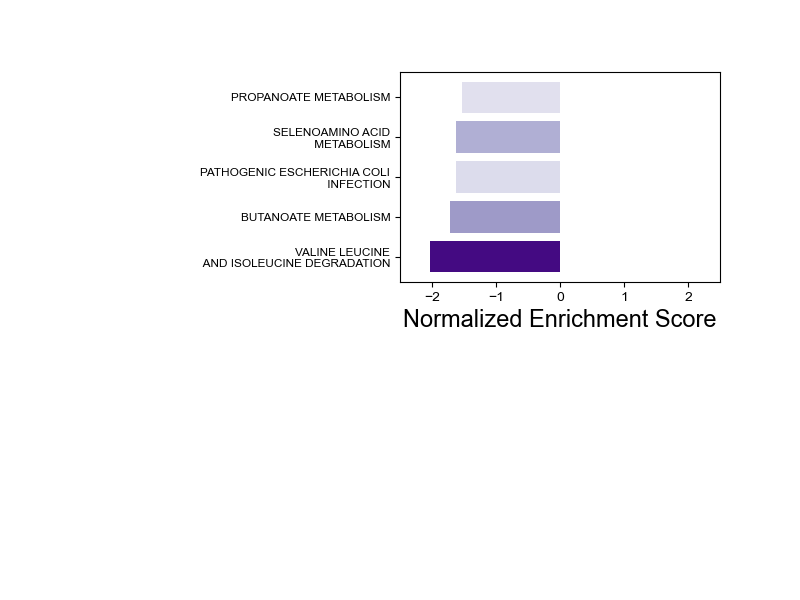

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
#fig.set_size_inches(4,3)

#cm.hsv(y / float(max(y)))
colors = cm.Purples_r((sig_res['FDR q-val'] / .3).to_list())

dots = ax.scatter(sig_res['NES'],sig_res['NES'],c = sig_res['FDR q-val'],cmap = 'Purples_r',vmin=0,vmax=.3)
ax.clear()

#cax = fig.add_axes([.5, .95, 0.4, 0.05])
#fig.colorbar(dots,cax=cax,orientation='horizontal')

ax.barh(formatted,sig_res['NES'], color = colors) #,height=.5

plt.rc('ytick', labelsize=8.5)    

ax.set_xlabel('Normalized Enrichment Score',fontsize='17')
ax.set_xlim(-2.5,2.5)

#Modify these parameters to make plot look consistent in width and height
fig.subplots_adjust(left=0.5)
fig.subplots_adjust(bottom=.53)

In [147]:
plt.savefig('sx_improve_cog_path_purp.pdf',bbox_inches = 'tight',dpi=300)  

In [76]:
plt.close('all')

In [24]:
#Lists of formatted names for each outcome for easier access/repetition 

sx_urinary_names = ['TYPE II DIABETES\n MELLITUS',
 'INTESTINAL IMMUNE\n NETWORK FOR IGA PRODUCTION',
 'PROPANOATE METABOLISM',
 'VALINE LEUCINE\n AND ISOLEUCINE DEGRADATION',
 'RETINOL METABOLISM',
 'GLYCEROPHOSPHOLIPID\n METABOLISM',
 'GRAFT VERSUS\n HOST DISEASE',
 'AUTOIMMUNE THYROID DISEASE',
 'ALLOGRAFT REJECTION',
 'GLYCOLYSIS\n GLUCONEOGENESIS',
 'GLYCEROLIPID METABOLISM',
 'ECM RECEPTOR\n INTERACTION']

sx_cognition_names = ['PROTEASOME',
 'PROTEIN EXPORT',
 'SELENOAMINO ACID METABOLISM',
 'CELL CYCLE',
 'SPLICEOSOME',
 'RNA DEGRADATION',
 'TYROSINE METABOLISM',
 'VIBRIO CHOLERAE INFECTION',
 'AMINOACYL TRNA BIOSYNTHESIS',
 'GLYCOSAMINOGLYCAN BIOSYNTHESIS\n HEPARAN SULFATE',
 'CYTOKINE CYTOKINE\n RECEPTOR INTERACTION',
 'HYPERTROPHIC CARDIOMYOPATHY\n HCM',
 'DILATED CARDIOMYOPATHY']

sx_improve_gait_names = ['ANTIGEN PROCESSING\n AND PRESENTATION',
 'ECM RECEPTOR\n INTERACTION',
 'ARACHIDONIC ACID\n METABOLISM']

sx_improve_urinary_names = ['ECM RECEPTOR\n INTERACTION', 'ACUTE MYELOID\n LEUKEMIA']

sx_improve_cog_names = ['VALINE LEUCINE AND\n ISOLEUCINE DEGRADATION',
 'BUTANOATE METABOLISM',
 'PATHOGENIC ESCHERICHIA COLI INFECTION',
 'SELENOAMINO ACID METABOLISM',
 'PROPANOATE METABOLISM']

sx_improve_gait_no_sNPH_names = ['ANTIGEN PROCESSING\n AND PRESENTATION',
 'ECM RECEPTOR\n INTERACTION',
 'ARACHIDONIC ACID\n METABOLISM']

sx_improve_urinary_no_sNPH_names = ['ECM RECEPTOR\n INTERACTION',
 'O GLYCAN\n BIOSYNTHESIS',
 'ANTIGEN PROCESSING\n AND PRESENTATION',
 'BASE EXCISION\n REPAIR',
 'OXIDATIVE PHOSPHORYLATION']

sx_improve_cog_no_sNPH_names = ['VALINE LEUCINE AND\n ISOLEUCINE DEGRADATION',
 'SELENOAMINO ACID\n METABOLISM',
 'BUTANOATE METABOLISM',
 'TYPE I DIABETES MELLITUS',
 'NICOTINATE AND\n NICOTINAMIDE METABOLISM',
 'COMPLEMENT AND\n COAGULATION CASCADES',
 'NEUROACTIVE LIGAND RECEPTOR\n INTERACTION',
 'VIRAL MYOCARDITIS',
 'SYSTEMIC LUPUS ERYTHEMATOSUS',
 'INTESTINAL IMMUNE NETWORK\n FOR IGA PRODUCTION',
 'LEISHMANIA INFECTION']
